## We looked at machine learning models that treat pixels as being independent inputs. Traditional fully connected neural network layers perform poorly on images because they do not take advantage of the fact that adjacent pixels are highly correlated.

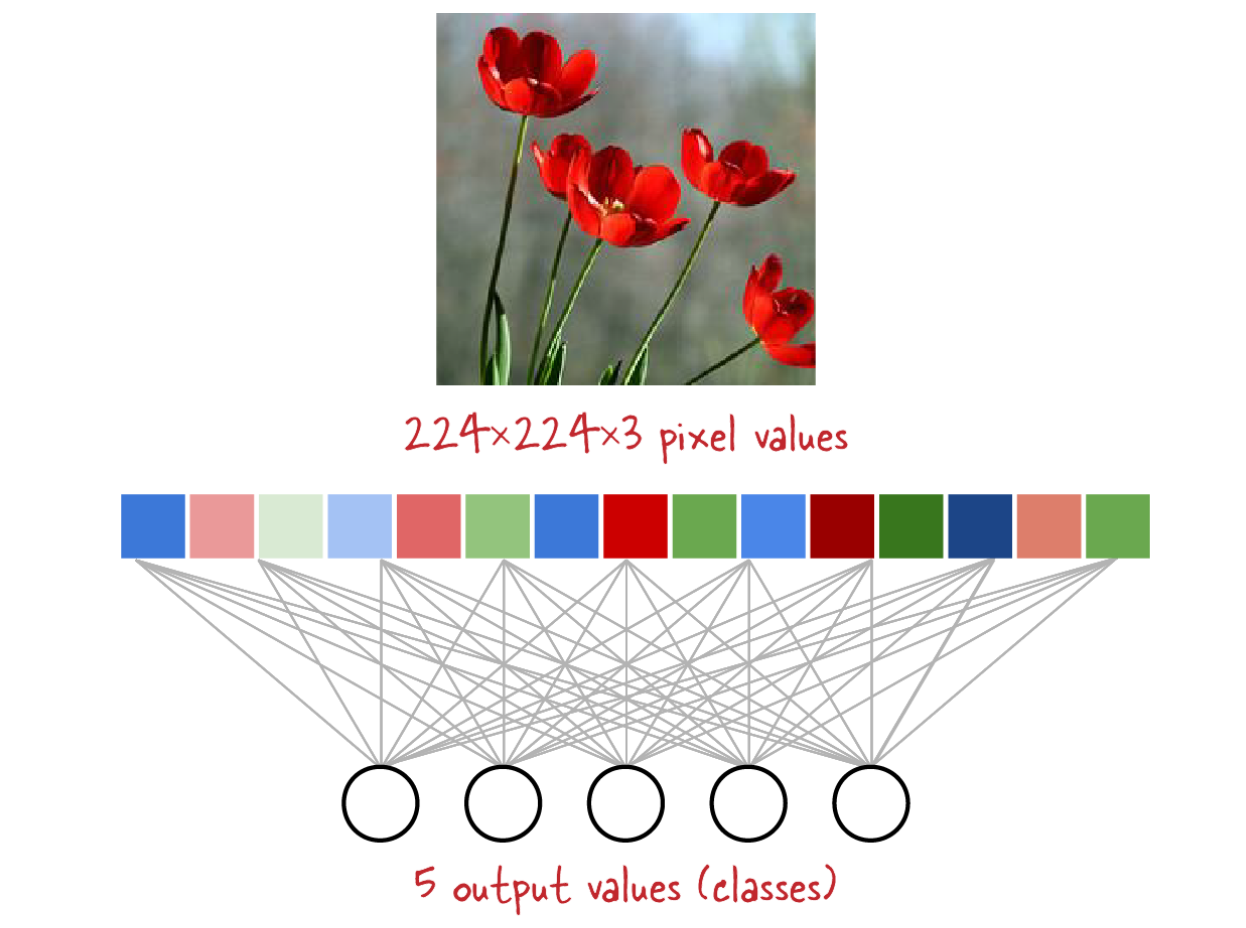
## <span style = "color:orange"> *Applying a fully connected layer to all the pixels of an image treats the pixels as independent inputs and ignores that images have adjacent pixels working together to create shapes.* </span>

## Pixels close to each other work together to create shapes (such as lines and arcs), and these shapes them‐ selves work together to create recognizable parts of an object (such as the stem and petals of a flower).

## We will learn techniques and model architectures that take advantage of the special properties of images.

# Convolutional Networks

## Convolutional layers were designed specifically for images. They operate in two dimensions and can capture shape information; they work by sliding a small window, called a convolutional filter, across the image in both directions.

## A typical 4x4 filter will have independent filter weights for each of the channels of the image. For color images with red, green, and blue channels, the filter will have 4 * 4 * 3 = 48 learnable weights in total. The filter is applied to a single position in the image by multiplying the pixel values in the neighborhood of that position by filter weights and summing them.

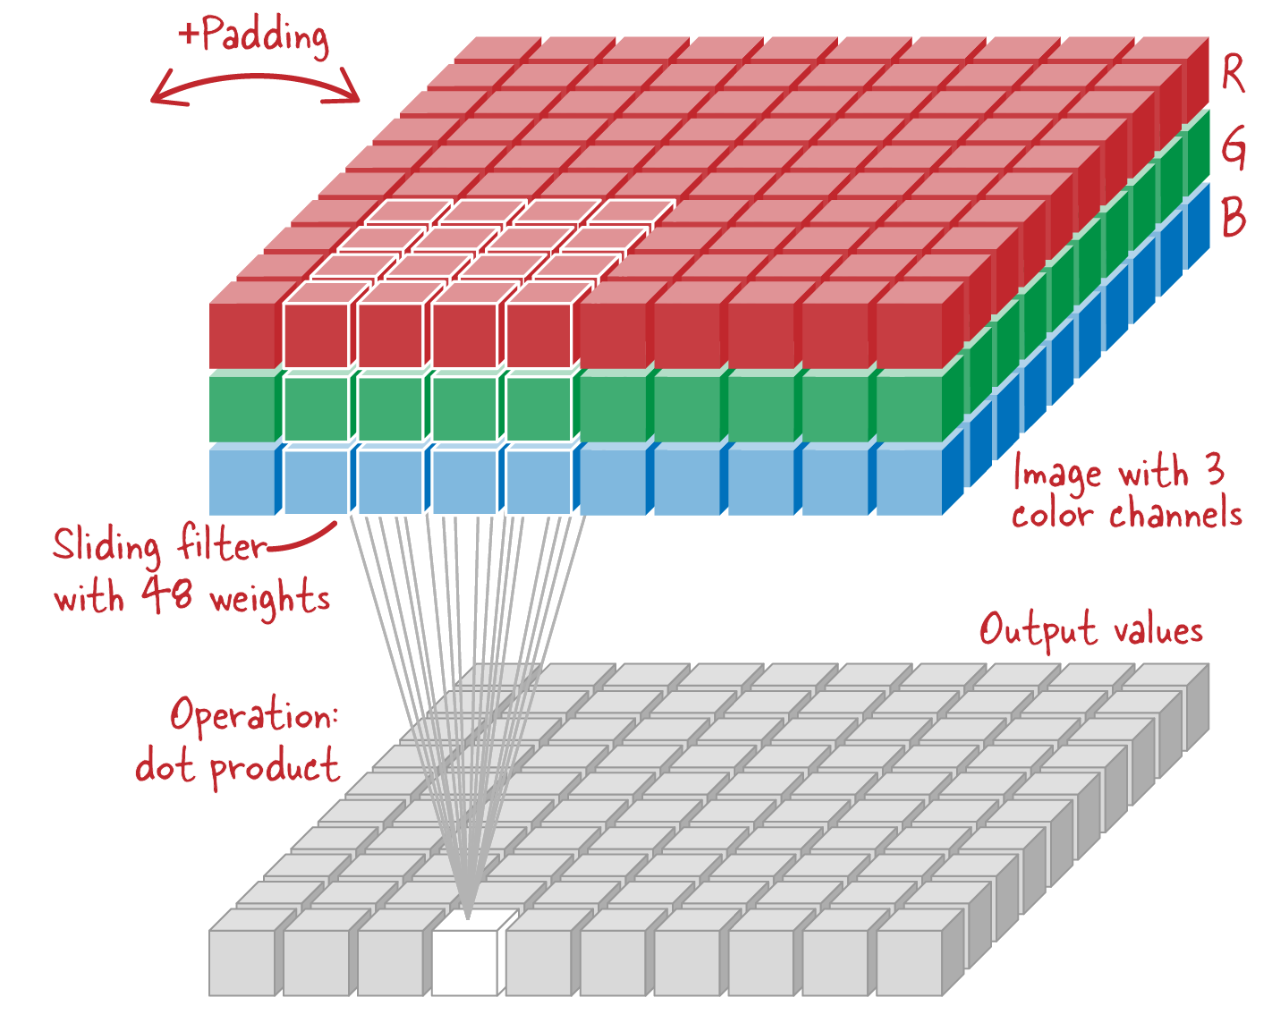

## <span style = "color:orange"> *Processing an image with a single 4x4 convolutional filter—the filter slides across the image in both directions, producing one output value at each position.* </span>

## This operation is called the tensor dot product. Computing the dot product at each position in the image by sliding the filter across the image is called a convolution.




## Convolutional filters have been used in image processing for a long time. They can achieve many different effects. For example, a filter where all the weights are the same is a “smoothing” filter (because each pixel within a window has an equal contribution for the resulting output pixel).

## Adjacent pixels tend to be highly correlated and work together to create what we call textures and edges at small scales and shapes at higher scales. That is where the information of the image is encoded, and that is also what convolutional filters are well equipped to detect.

## A convolutional neural network filter, therefore, makes it possible for the machine learning model to learn the arrangement of weights that best picks up pertinent details from the training data. The network will learn whatever combination of weights will minimize the loss.

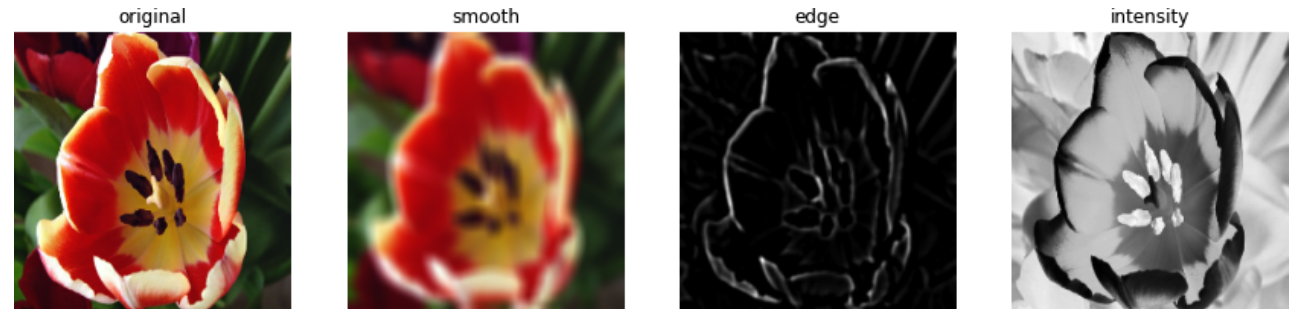
## <span style = "color:orange"> *The effects of different convolutional filters.* </span>


## A convolutional layer typically contains tens or hundreds of similar filters, each with its own independent learnable weights.

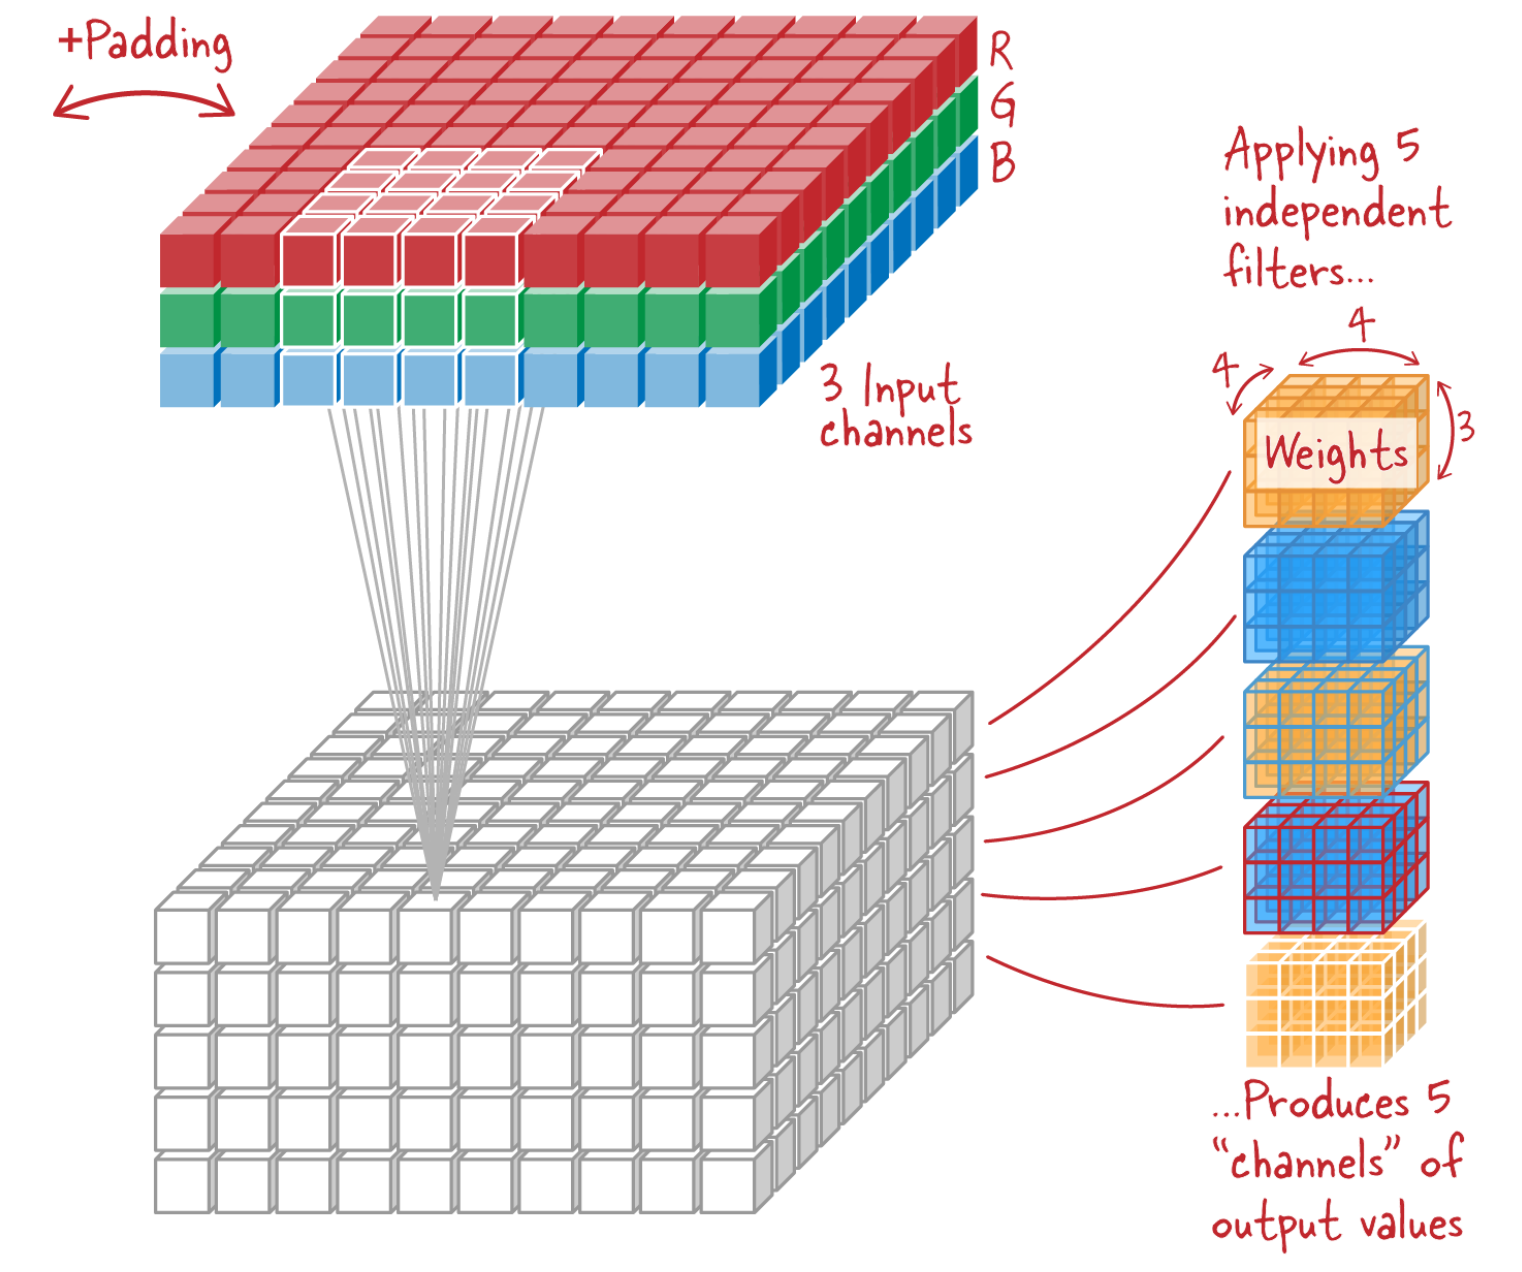
## <span style = "color:orange"> *Processing an image with a convolutional layer made up of multiple convolutional filters—all filters are of the same size (here, 4x4x3) but have independent learnable weights.* </span>


## Understanding the structure of a convolutional layer makes it easy to compute its number of learnable weights
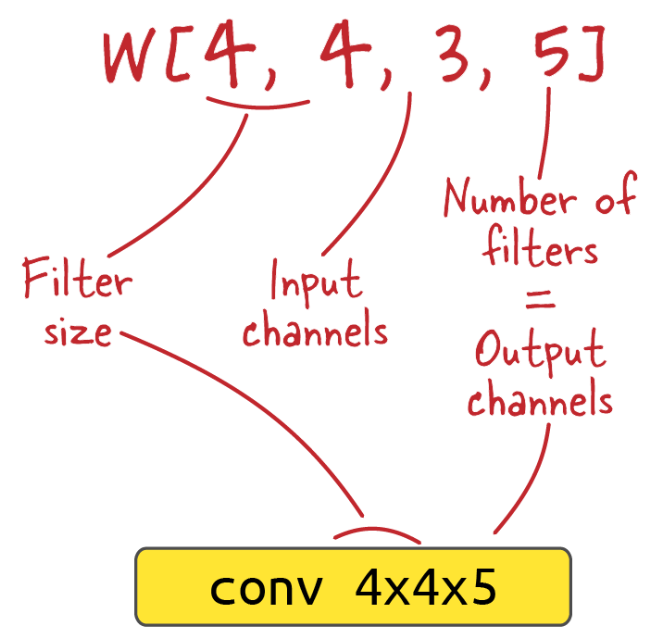

## <span style = "color:orange"> *W, the weights matrix of a convolutional layer.* </span>

## In this case, with 5 filters applied, what is the total number of learnable weights in this convolutional layer?

## It is 4 x 4 x 3 x 5 = 240 trainable weights.

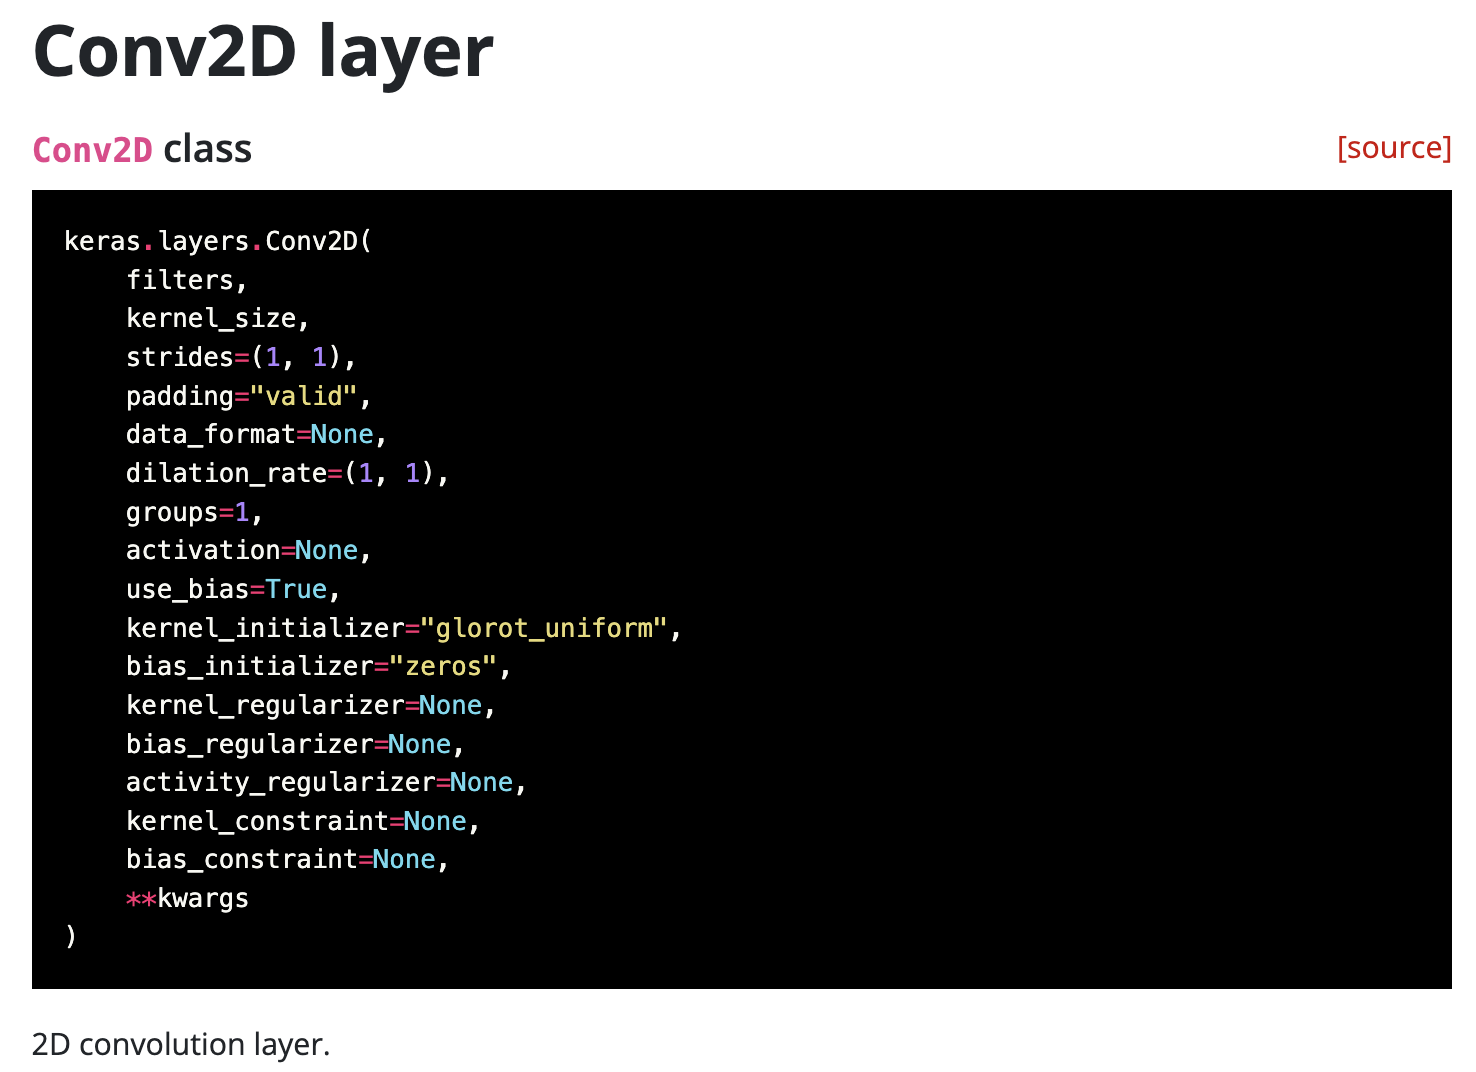
https://keras.io/api/layers/convolution_layers/convolution2d/


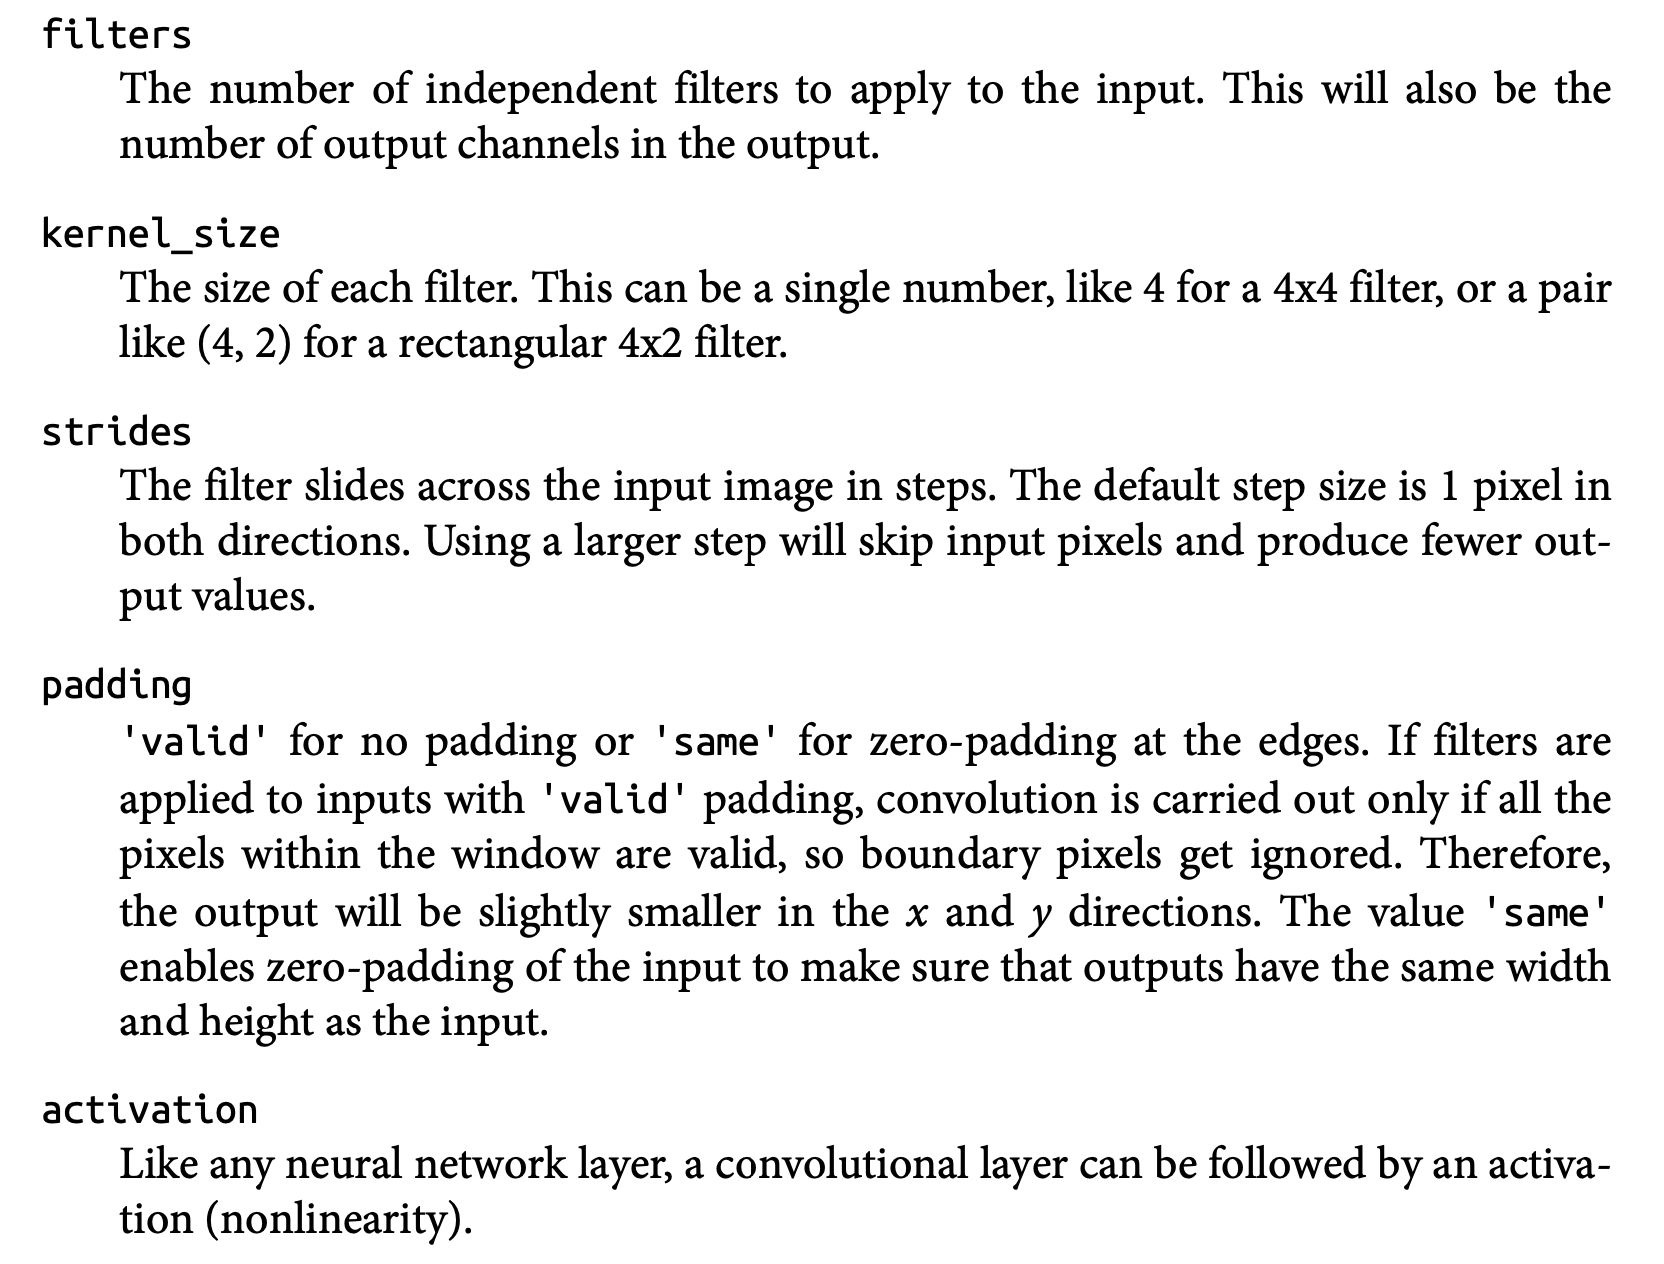

In [ ]:
keras.layers.Conv2D(32, 3, (1,1), padding = 'same', activation='relu')

## An example of stacked convolutional layers

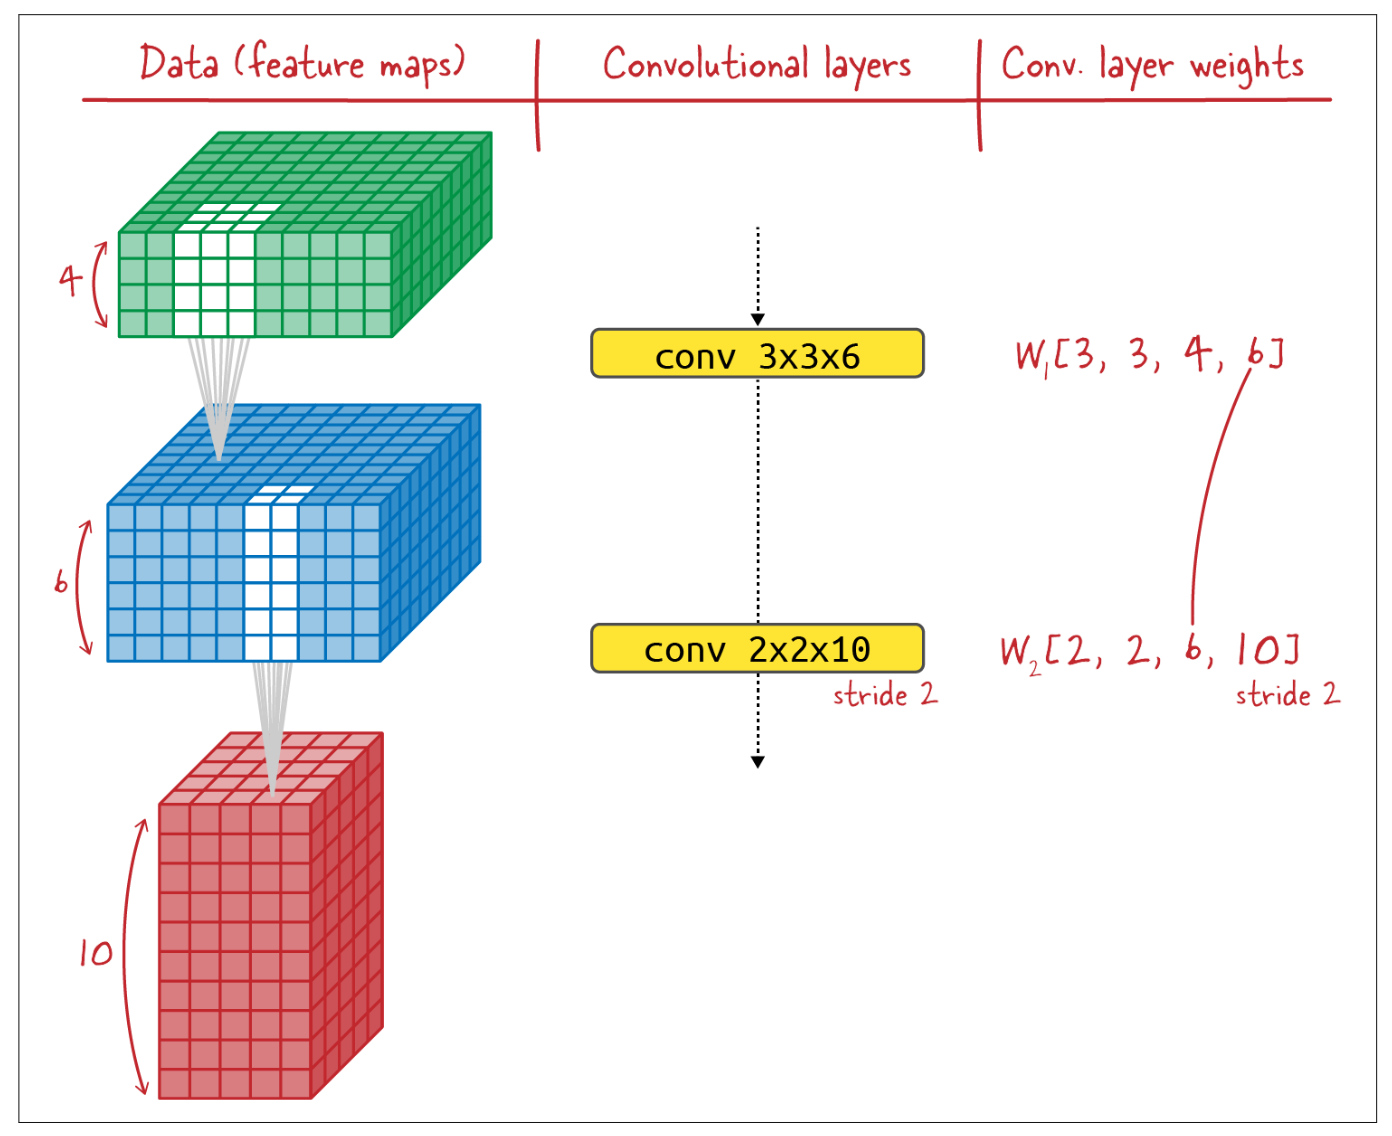

## Starting from the top, the first layer is a 3x3 filter applied to an input with four channels of data. The filter is applied to the input six times, each time with different filter weights, resulting in six channels of output values. This in turn is fed into a second convolutional layer using 2x2 filters. Notice that the second convolutional layer uses a stride of 2 (every other pixel) when applying its filters to obtain fewer output values (in the horizontal plane).

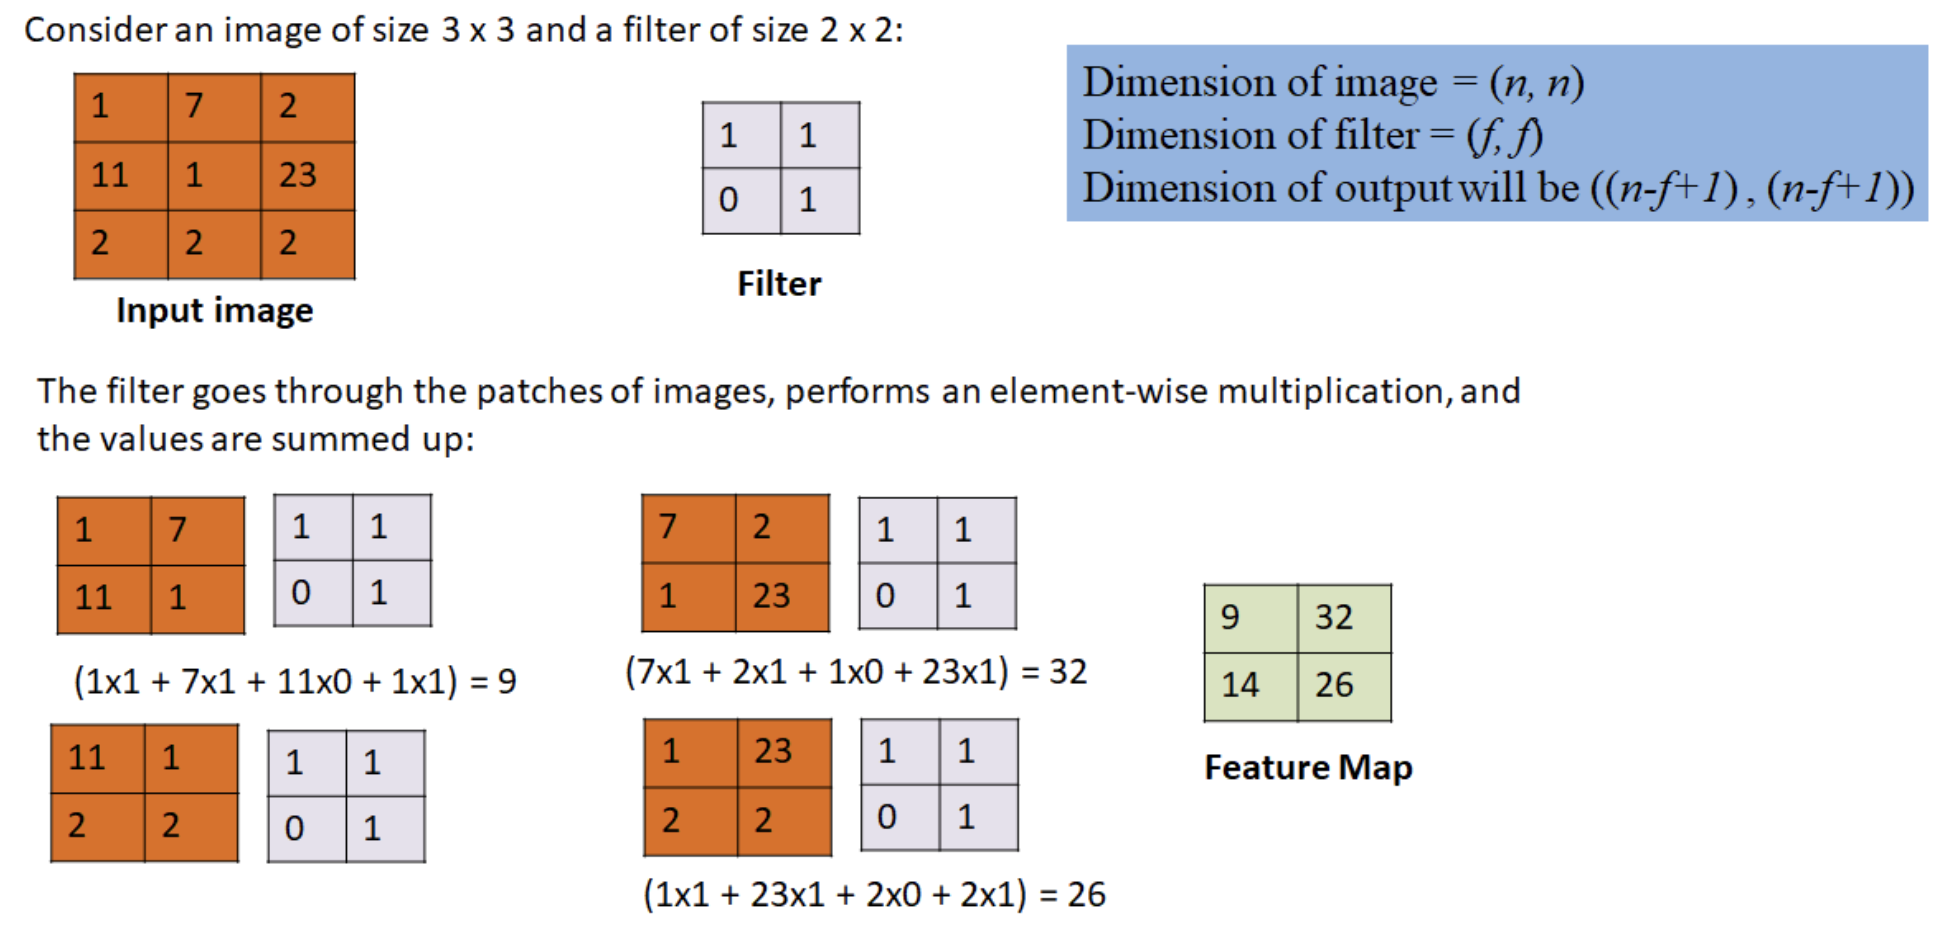

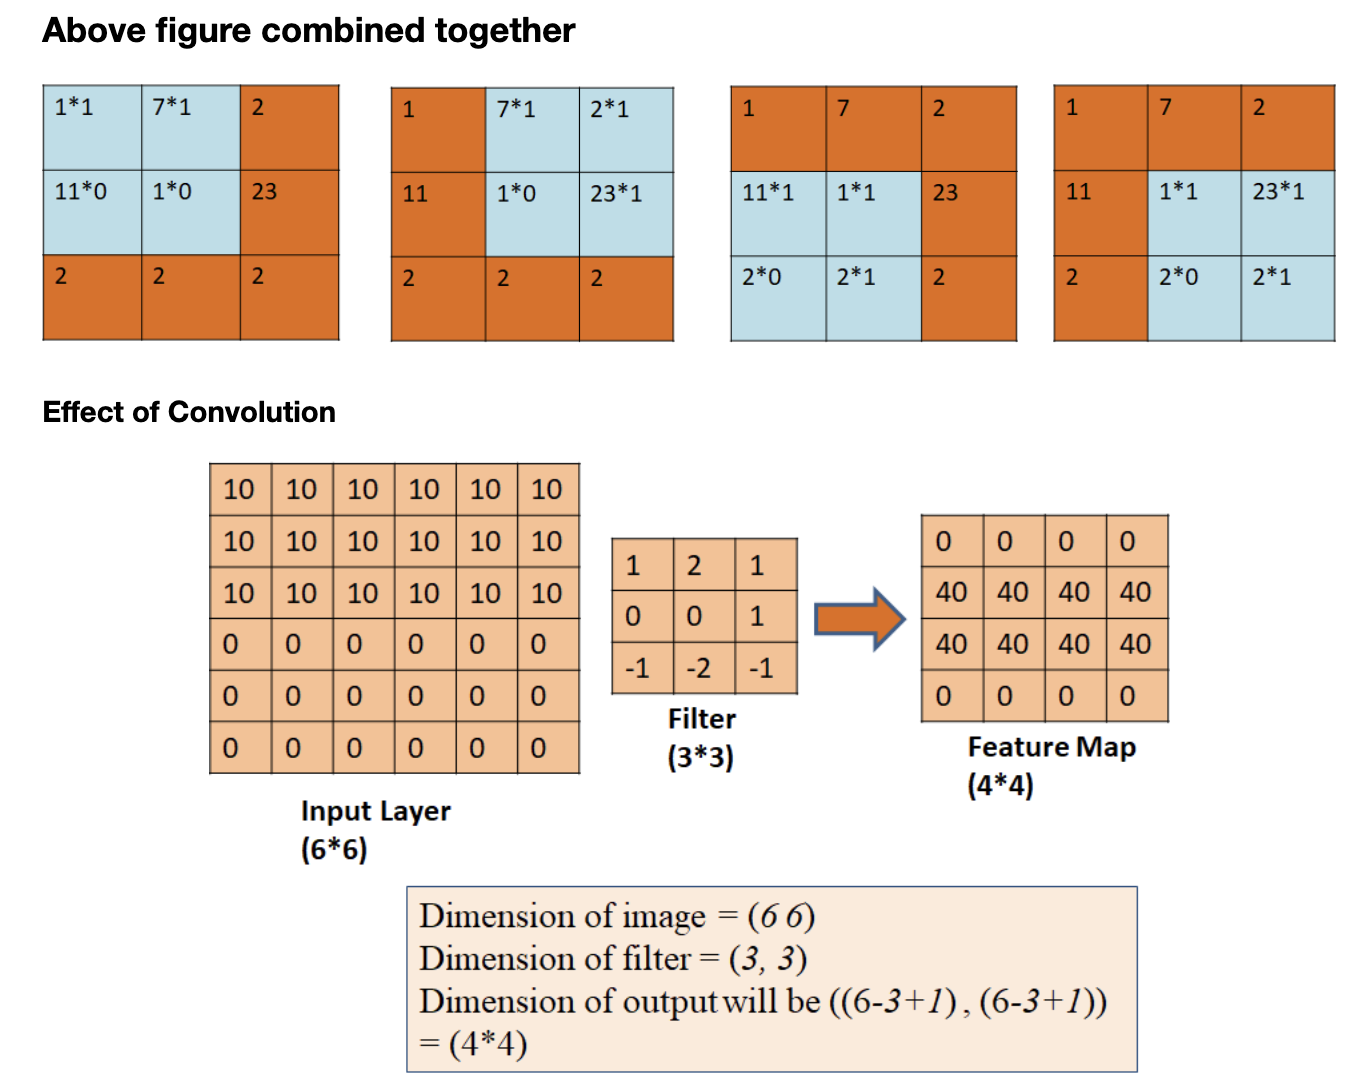

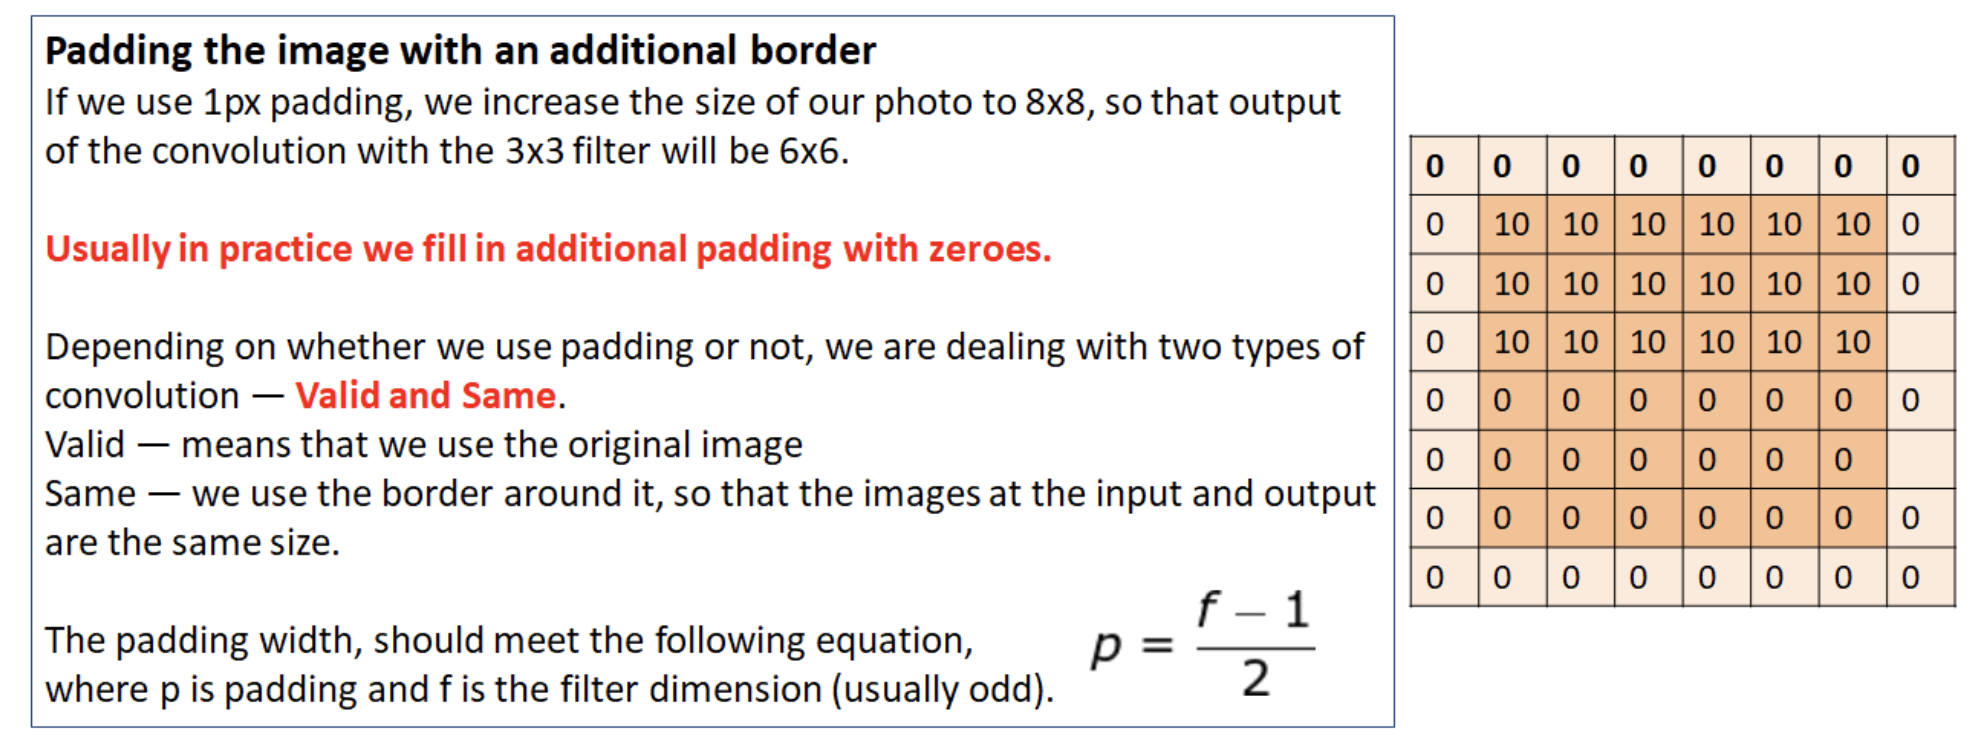

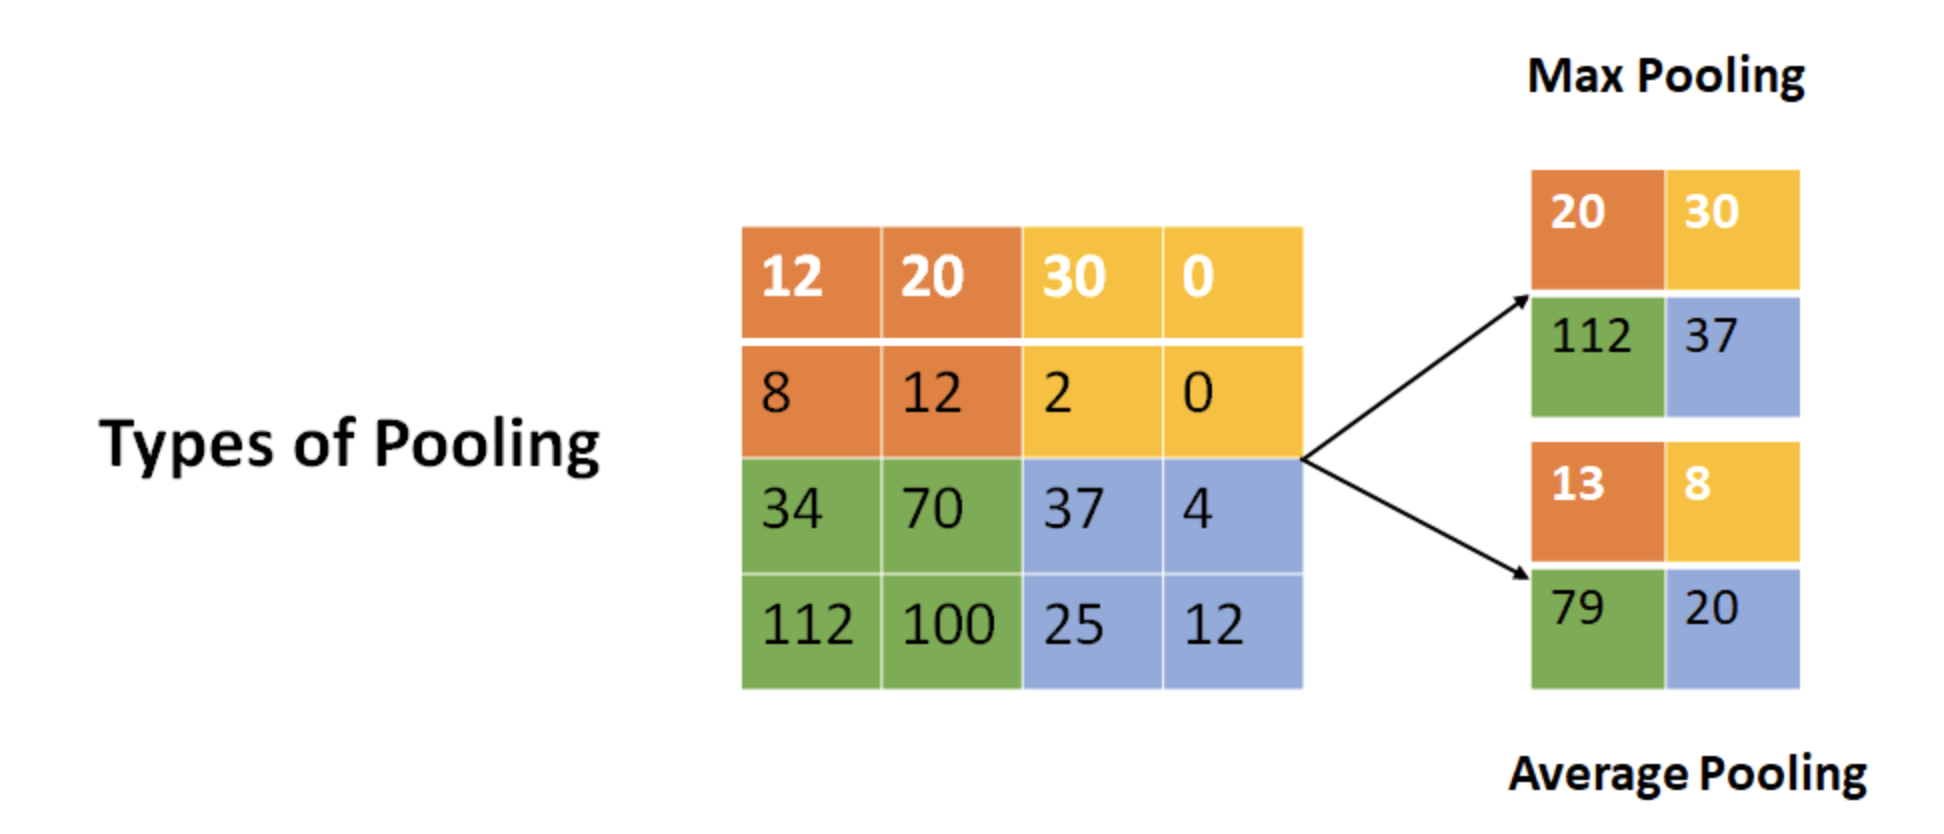

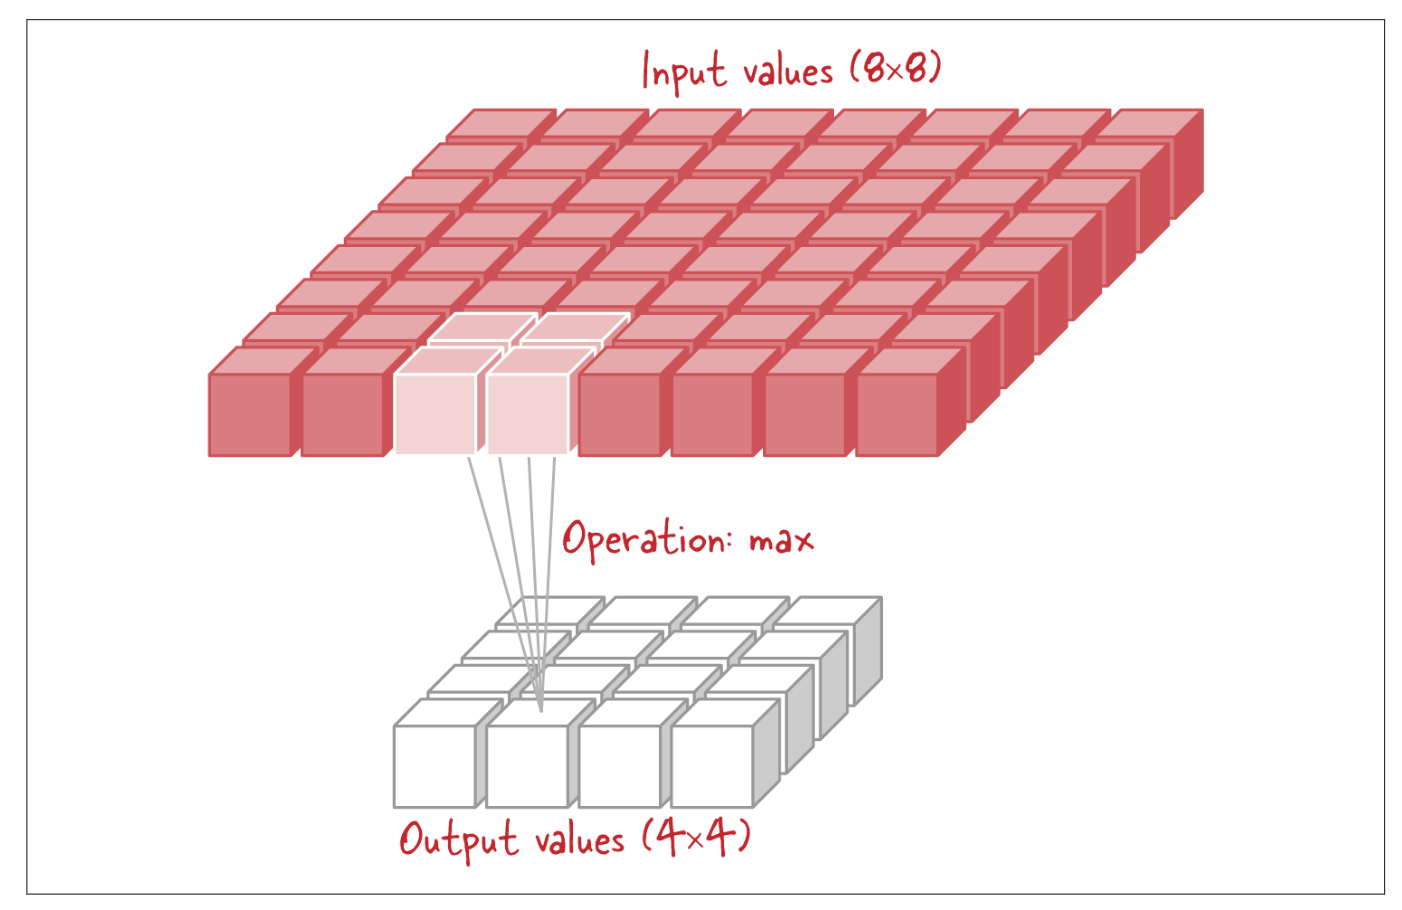

## Note that max-pooling and average-pooling layers do not have any trainable weights. They are purely size adjustment layers.

## There is an interesting physical explanation of why max-pooling layers work well with convolutional layers in neural networks. Convolutional layers are series of trainable filters. After training, each filter specializes in matching some specific image feature. The first layer in a convolutional neural network reacts to pixel combinations in the input image, but subsequent layers react to combinations of features from the previous layers. For example, in a neural network trained to recognize cats, the first layer reacts to basic image components like horizontal and vertical lines or the texture of fur. Subsequent layers react to specific combinations of lines and fur to recognize pointy ears, whiskers, or cat eyes. Even later layers detect a combination of pointy ears + whiskers + cat eyes as a cat head. A max-pooling layer only keeps values where some feature X was detected with maximum intensity. If the goal is to reduce the number of values but keep the ones most representative of what was detected, it makes sense.


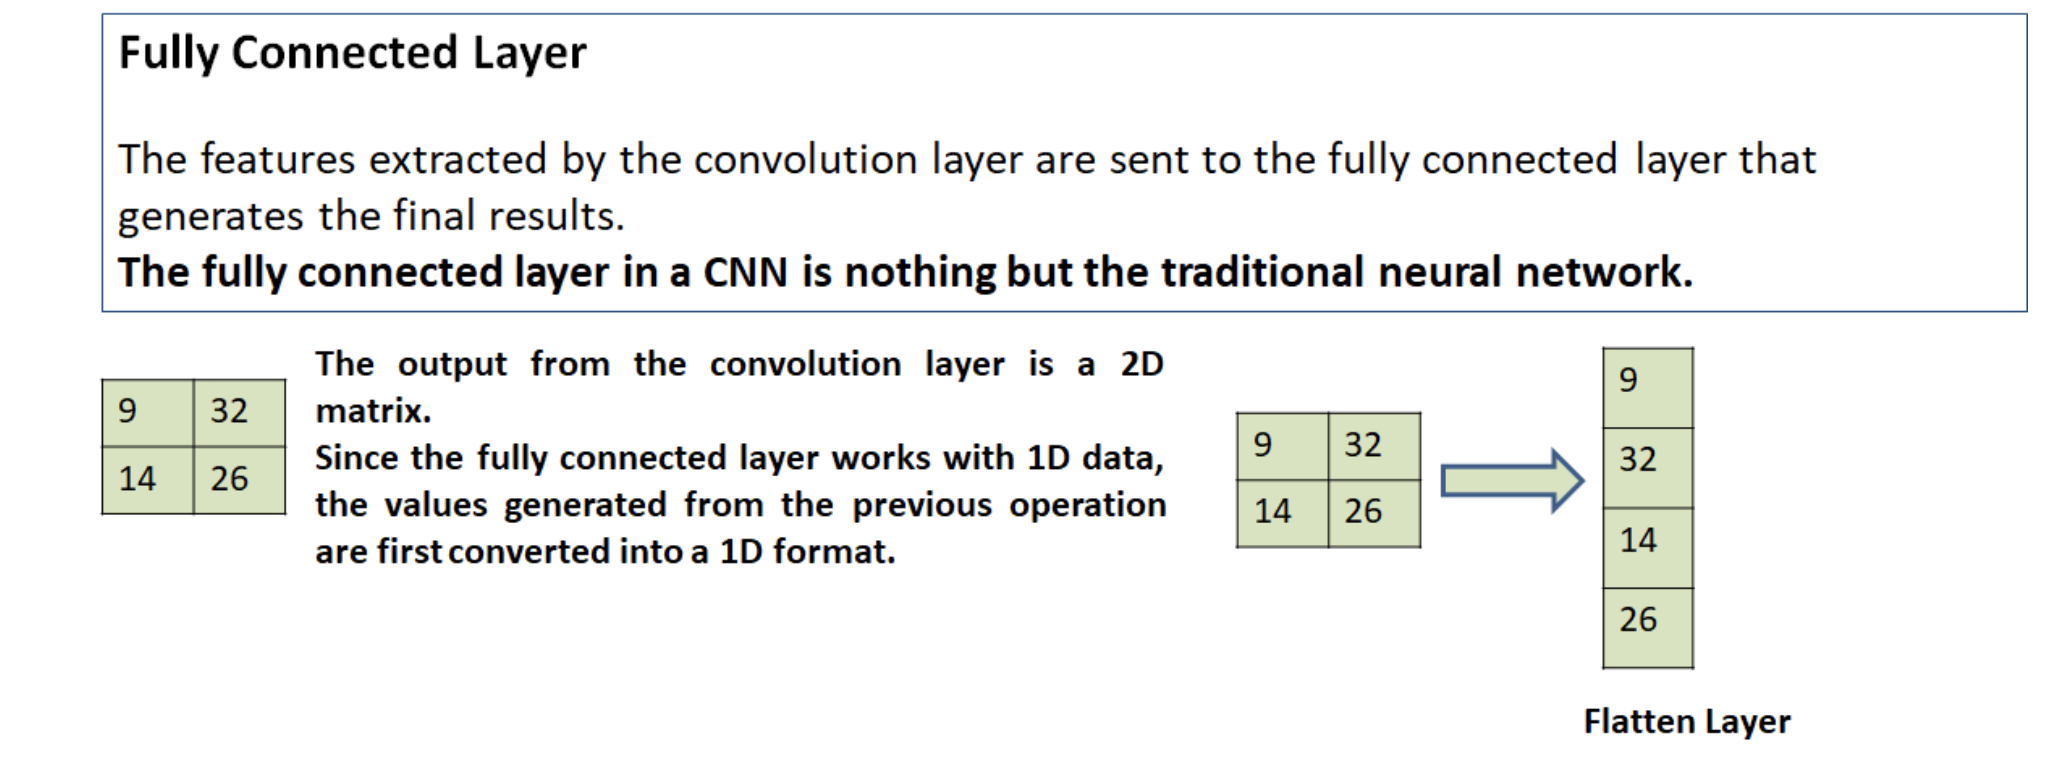

## Output dimensions and hyperparameters of Convolution layer
The dimension of the output image of a Convolution layer is calculated through the following formula:

$$\begin{align}({\lfloor{\frac{n+2p-f}{s}+1}\rfloor} \,\,\,\,\text{,}\,\,\,\, {\lfloor{\frac{n+2p-f}{s}+1}\rfloor})\end{align}$$

where the input image is of shape ${(n,n)}$, filter/kernel is of shape ${(f,f)}$, padding is ${(p,p)}$ and stride is ${(s,s)}$.

#### Output dimensions and hyperparameters of Activation layer
The dimension of the output image of a Activation layer is same as the dimension of the input image.

#### Output dimensions and hyperparameters of MaxPooling layer
The dimension of the output image of a MaxPooling layer is calculated through the following formula:

The resulting output, when using the "valid" padding option (i.e. no padding), has a spatial shape (number of rows or columns) of: 

$$\begin{align}({\lfloor{\frac{n-f}{s}+1}\rfloor} \,\,\,\,\text{,}\,\,\,\, {\lfloor{\frac{n-f}{s}+1}\rfloor})\end{align}$$

where the input image is of shape ${(n,n)}$, filter/kernel is of shape ${(f,f)}$, and stride is ${(s,s)}$.

The resulting output shape when using the "same" padding option is:

$$\begin{align}({\lfloor{\frac{n-1}{s}+1}\rfloor} \,\,\,\,\text{,}\,\,\,\, {\lfloor{\frac{n-1}{s}+1}\rfloor})\end{align}$$

where the input image is of shape ${(n,n)}$, and stride is ${(s,s)}$. The bracket indicates floor operation. 

#### Output dimensions and hyperparameters of Flatten layer
The dimension of the output image of a Flatten layer is calculated through the following formula:

$$\begin{align}\text{output_shape} = n \times m \times d\end{align}$$

where the input image is of shape ${(n,m,d)}$

#### Output dimensions and hyperparameters of Dense layer
The dimension of the output image of a Dense or Fully-connected layer is specified by is equal to the units specified in the Dense layer.